# Optimizing Dry Bean Sorting into Classes using Classification with K-nearest neighbors

### Introduction:

Checklist
1. provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
2. clearly state the question you tried to answer with your project
3. identify and describe the dataset that was used to answer the question

### Methods & Results:

Checklist
1. loads data from the original source on the web -- (DONE) 
2. wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis -- (DONE) 
3. performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis -- (DONE)
4. creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis -- (DONE)
5. performs the data analysis
6. creates a visualization of the analysis 
7. note: all tables and figure should have a figure/table number and a legend

In [2]:
# Download libraries
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
# set seed
set.seed(25)

In [4]:
# Load data 
url <- "https://github.com/NaziaNadir/dsci-100-2023-007-group-8/raw/main/Dry_Bean_Dataset.csv"
bean_data <- read_csv(url)
bean_data

Rows: 13611 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Class
dbl (16): Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, E...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
28395,610.291,208.1781,173.8887,1.197191,0.5498122,28715,190.1411,0.7639225,0.9888560,0.9580271,0.9133578,0.007331506,0.003147289,0.8342224,0.9987239,SEKER
28734,638.018,200.5248,182.7344,1.097356,0.4117853,29172,191.2728,0.7839681,0.9849856,0.8870336,0.9538608,0.006978659,0.003563624,0.9098505,0.9984303,SEKER
29380,624.110,212.8261,175.9311,1.209713,0.5627273,29690,193.4109,0.7781132,0.9895588,0.9478495,0.9087742,0.007243912,0.003047733,0.8258706,0.9990661,SEKER
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
42139,759.321,281.5399,191.1880,1.472582,0.7340648,42569,231.6313,0.7299324,0.9898988,0.9184241,0.8227297,0.006681220,0.001888271,0.6768842,0.9967673,DERMASON
42147,763.779,283.3826,190.2757,1.489326,0.7410548,42667,231.6532,0.7053891,0.9878126,0.9079065,0.8174575,0.006723673,0.001852025,0.6682367,0.9952224,DERMASON
42159,772.237,295.1427,182.2047,1.619841,0.7866930,42600,231.6862,0.7889625,0.9896479,0.8883804,0.7849972,0.007000705,0.001639812,0.6162206,0.9981796,DERMASON


In [5]:
#Wrangle/clean data 

clean_bean_data<-bean_data|>
mutate(Class=as_factor(Class))

clean_bean_data<-na.omit(clean_bean_data)

clean_bean_data

Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
28395,610.291,208.1781,173.8887,1.197191,0.5498122,28715,190.1411,0.7639225,0.9888560,0.9580271,0.9133578,0.007331506,0.003147289,0.8342224,0.9987239,SEKER
28734,638.018,200.5248,182.7344,1.097356,0.4117853,29172,191.2728,0.7839681,0.9849856,0.8870336,0.9538608,0.006978659,0.003563624,0.9098505,0.9984303,SEKER
29380,624.110,212.8261,175.9311,1.209713,0.5627273,29690,193.4109,0.7781132,0.9895588,0.9478495,0.9087742,0.007243912,0.003047733,0.8258706,0.9990661,SEKER
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
42139,759.321,281.5399,191.1880,1.472582,0.7340648,42569,231.6313,0.7299324,0.9898988,0.9184241,0.8227297,0.006681220,0.001888271,0.6768842,0.9967673,DERMASON
42147,763.779,283.3826,190.2757,1.489326,0.7410548,42667,231.6532,0.7053891,0.9878126,0.9079065,0.8174575,0.006723673,0.001852025,0.6682367,0.9952224,DERMASON
42159,772.237,295.1427,182.2047,1.619841,0.7866930,42600,231.6862,0.7889625,0.9896479,0.8883804,0.7849972,0.007000705,0.001639812,0.6162206,0.9981796,DERMASON


In [8]:
# Data set exploration summary

In [6]:
# Name of each category in Class column
clean_bean_data |>
  pull(Class) |>
  levels()

[1] "SEKER"    "BARBUNYA" "BOMBAY"   "CALI"     "HOROZ"    "SIRA"     "DERMASON"

In [7]:
# Number and percentage of each category
num_obs <- nrow(clean_bean_data)

bean_number<-clean_bean_data|>
  group_by(Class) |>
  summarize(
    count = n(),
    percentage = n() / num_obs * 100)
print(bean_number)

# A tibble: 7 × 3
  Class    count percentage
  <fct>    <int>      <dbl>
1 SEKER     2027      14.9 
2 BARBUNYA  1322       9.71
3 BOMBAY     522       3.84
4 CALI      1630      12.0 
5 HOROZ     1928      14.2 
6 SIRA      2636      19.4 
7 DERMASON  3546      26.1 


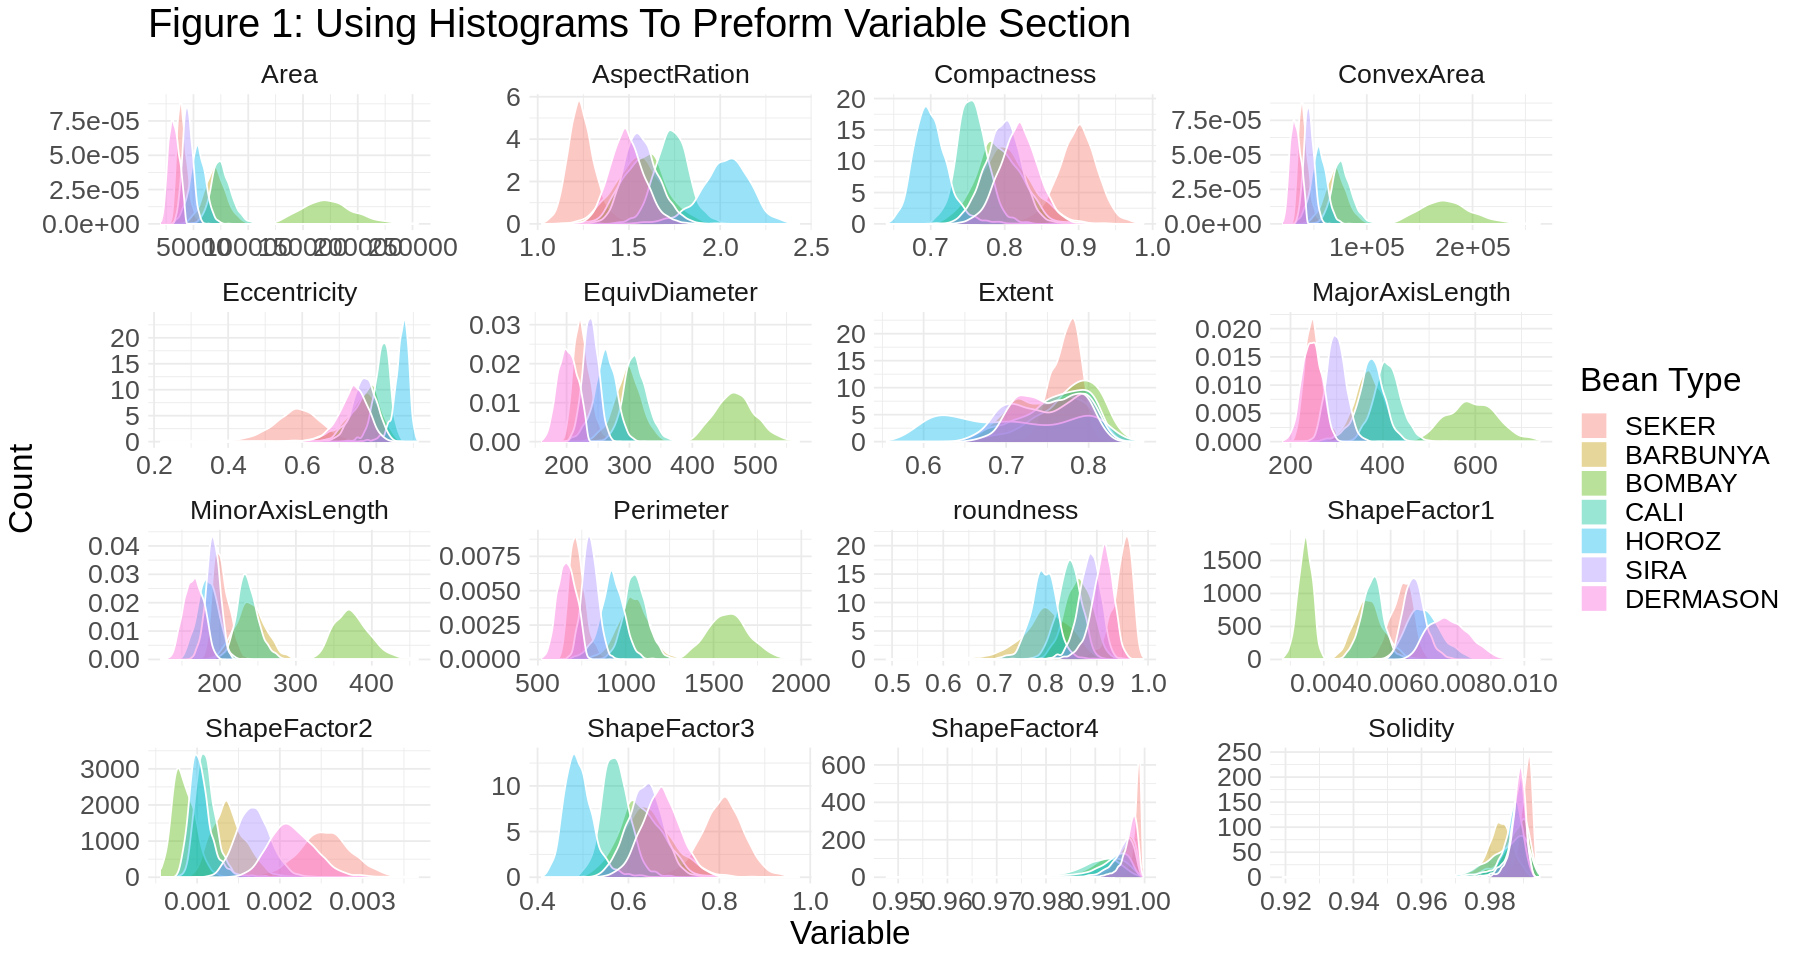

In [8]:
# Predictor selection

options(repr.plot.height = 8, repr.plot.width = 15)
clean_bean_data |>
    pivot_longer(cols = -Class, names_to = 'category', values_to = 'value')  |> 
    ggplot(aes(value, fill = Class)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(facets = vars(category), scales = 'free') +
        theme_minimal() +
        labs(x="Variable", y="Count", fill="Bean Type")+
        ggtitle("Figure 1: Using Histograms To Preform Variable Section")+
        theme(text = element_text(size = 20))

To choose our predictors:

First, we removed variables we don't understand. These include shape factors 1, 2, 3, and 4.

Next, we removed variables that convey similar things making them redundant. When it comes to using them as predictors, this will cause our model to place a greater emphasis on those predictors since they're counted twice. 

1. The aspect ratio is the relationship between the major and minor axis of an object. So, we removed the major axis and minor axis. 
2. Area is similar to perimeter. So, we removed the area.

Lastly, we utilized histograms to visualize the distribution of different variables. If the distributions between the graphs greatly overlap then it might not be a good predictor because if an unknown observation was used, it'd be within a cluster of many different bean types. If one distribution was skewed to the right and one distribution was skewed to the left, i.e. very little overlap that could be an indication of a good predictor. Referring to figure 1, distribution of the solidity graph shows notable overlap between every class of bean; thus, this variable was removed.

Therefore, we are left with and will be using the following variables to be used in our classifier:
Area, AspectRation, Compactness, ConvexArea, Eccentricity, EquivDiameter, Extent, Perimeter, and Roundness.


In [9]:
#Update data set
final_bean_data<-clean_bean_data|>
select("Area", "AspectRation", "Compactness", "ConvexArea", "Eccentricity",
       "EquivDiameter", "Extent", "Perimeter", "roundness", "Class")
final_bean_data

Area,AspectRation,Compactness,ConvexArea,Eccentricity,EquivDiameter,Extent,Perimeter,roundness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
28395,1.197191,0.9133578,28715,0.5498122,190.1411,0.7639225,610.291,0.9580271,SEKER
28734,1.097356,0.9538608,29172,0.4117853,191.2728,0.7839681,638.018,0.8870336,SEKER
29380,1.209713,0.9087742,29690,0.5627273,193.4109,0.7781132,624.110,0.9478495,SEKER
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
42139,1.472582,0.8227297,42569,0.7340648,231.6313,0.7299324,759.321,0.9184241,DERMASON
42147,1.489326,0.8174575,42667,0.7410548,231.6532,0.7053891,763.779,0.9079065,DERMASON
42159,1.619841,0.7849972,42600,0.7866930,231.6862,0.7889625,772.237,0.8883804,DERMASON


In [10]:
#Create the train/ test split
bean_split <- initial_split(final_bean_data, prop = 0.50, strata = Class)
bean_train <- training(bean_split)
bean_test <- testing(bean_split)

In [11]:
glimpse(bean_train)

Rows: 6,804
Columns: 10
$ Area          <dbl> 43145, 47149, 49755, 50167, 50575, 51015, 52839, 53525, …
$ AspectRation  <dbl> 1.358410, 1.499042, 1.729713, 1.498715, 1.529822, 1.6516…
$ Compactness   <dbl> 0.8572690, 0.8159311, 0.7579074, 0.8155538, 0.8073124, 0…
$ ConvexArea    <dbl> 43812, 48091, 50783, 50937, 51389, 51718, 53489, 54660, …
$ Eccentricity  <dbl> 0.6768132, 0.7449746, 0.8159441, 0.7448443, 0.7567789, 0…
$ EquivDiameter <dbl> 234.3799, 245.0142, 251.6943, 252.7343, 253.7599, 254.86…
$ Extent        <dbl> 0.7661233, 0.7207674, 0.7342828, 0.7945989, 0.7121233, 0…
$ Perimeter     <dbl> 799.426, 857.690, 868.813, 873.825, 858.520, 859.253, 88…
$ roundness     <dbl> 0.8483671, 0.8054186, 0.8283120, 0.8256178, 0.8622733, 0…
$ Class         <fct> BARBUNYA, BARBUNYA, BARBUNYA, BARBUNYA, BARBUNYA, BARBUN…


In [12]:
glimpse(bean_test)

Rows: 6,807
Columns: 10
$ Area          <dbl> 28395, 30008, 30279, 30519, 30685, 30917, 31091, 31107, …
$ AspectRation  <dbl> 1.197191, 1.153638, 1.171067, 1.165591, 1.165852, 1.1578…
$ Compactness   <dbl> 0.9133578, 0.9283288, 0.9237260, 0.9254804, 0.9256585, 0…
$ ConvexArea    <dbl> 28715, 30724, 30600, 30847, 31044, 31280, 31458, 31423, …
$ Eccentricity  <dbl> 0.5498122, 0.4986160, 0.5204007, 0.5137596, 0.5140809, 0…
$ EquivDiameter <dbl> 190.1411, 195.4671, 196.3477, 197.1243, 197.6597, 198.40…
$ Extent        <dbl> 0.7639225, 0.7826813, 0.7756885, 0.7706818, 0.7715615, 0…
$ Perimeter     <dbl> 610.291, 645.884, 634.927, 629.727, 635.681, 640.765, 63…
$ roundness     <dbl> 0.9580271, 0.9039364, 0.9438518, 0.9671092, 0.9542398, 0…
$ Class         <fct> SEKER, SEKER, SEKER, SEKER, SEKER, SEKER, SEKER, SEKER, …


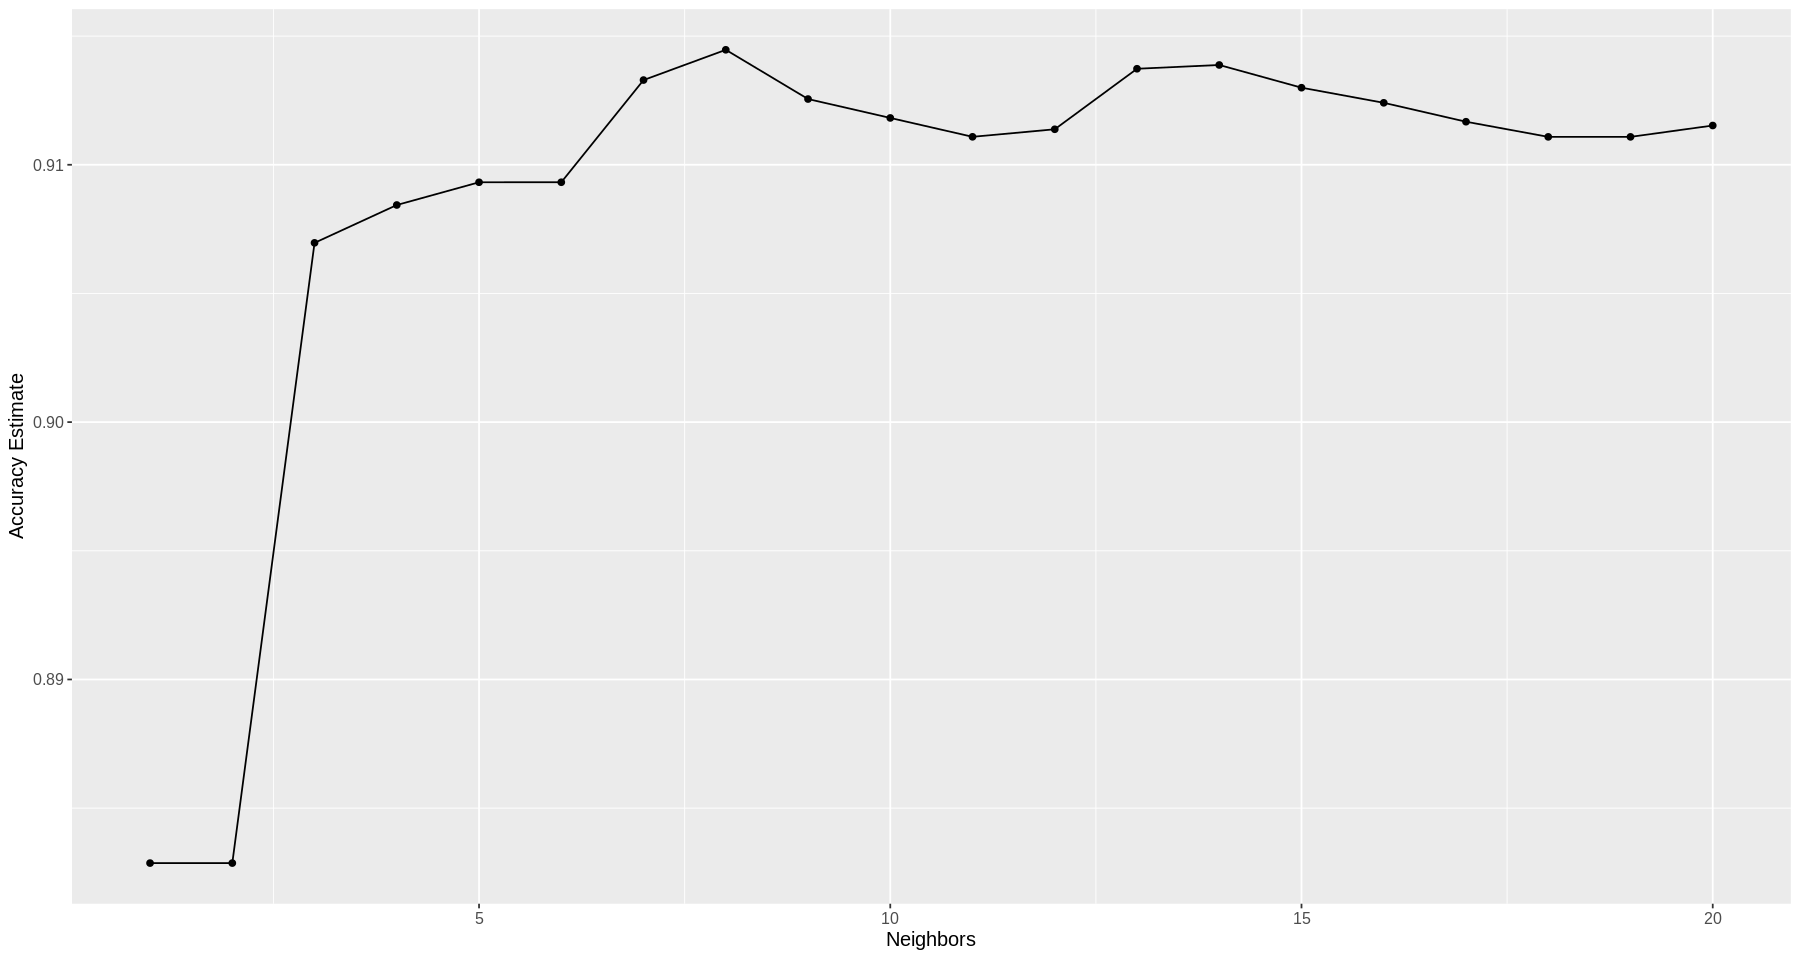

In [13]:
# K value selection

knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

bean_recipe <- recipe(Class ~., 
                        data = bean_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

bean_vfold <- vfold_cv(bean_train, v = 5, strata = Class)

k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

knn_results <- workflow() |>
  add_recipe(bean_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = bean_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_vs_k


### Discussion:

Checklist 
1. summarize what you found
2. discuss whether this is what you expected to find?
3. discuss what impact could such findings have?
4. discuss what future questions could this lead to?

### References

Checklist
1. At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
2. Make sure to cite the source of your data as well.